### This code calculate Fibonacci level indicator
#### The used data is daily and for Amazon stock

In [4]:
import pandas as pd
import yfinance
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey=S5MWNN99HI7DEL1T&datatype=csv'
df = pd.read_csv(url)

In [5]:
#df=(df.iloc[::-1]).reset_index(drop=True)
df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2021-11-02,3315.010,3331.115,3283.5500,3312.75,3312.75,2562277,0.0,1.0
1,2021-11-01,3361.800,3375.860,3292.0200,3318.11,3318.11,3582044,0.0,1.0
2,2021-10-29,3300.020,3374.820,3273.3200,3372.43,3372.43,6486077,0.0,1.0
3,2021-10-28,3402.095,3479.000,3386.0000,3446.57,3446.57,5708733,0.0,1.0
4,2021-10-27,3388.000,3437.000,3371.4534,3392.49,3392.49,2702224,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5533,1999-11-05,64.750,65.500,62.2500,64.94,64.94,11091400,0.0,1.0
5534,1999-11-04,67.190,67.190,61.0000,63.06,63.06,16759200,0.0,1.0
5535,1999-11-03,68.190,68.500,65.0000,65.81,65.81,10772100,0.0,1.0
5536,1999-11-02,69.750,70.000,65.0600,66.44,66.44,13243200,0.0,1.0


In [6]:
# Limit the time range
#df=(df.iloc[-30:-1,:]).reset_index(drop=True)
#df

In [7]:
highest_swing = -1
lowest_swing = -1

for i in range(1,df.shape[0]-1):
    if df['high'][i] > df['high'][i-1] and df['high'][i] > df['high'][i+1] and (highest_swing == -1 or df['high'][i] > df['high'][highest_swing]):
        highest_swing = i
    if df['low'][i] < df['low'][i-1] and df['low'][i] < df['low'][i+1] and (lowest_swing == -1 or df['low'][i] < df['low'][lowest_swing]):
        lowest_swing = i

In [8]:
ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['high'][highest_swing]
min_level = df['low'][lowest_swing]
for ratio in ratios:
    if highest_swing > lowest_swing: # Uptrend
        levels.append(max_level - (max_level-min_level)*ratio)
    else: # Downtrend
        levels.append(min_level + (max_level-min_level)*ratio)

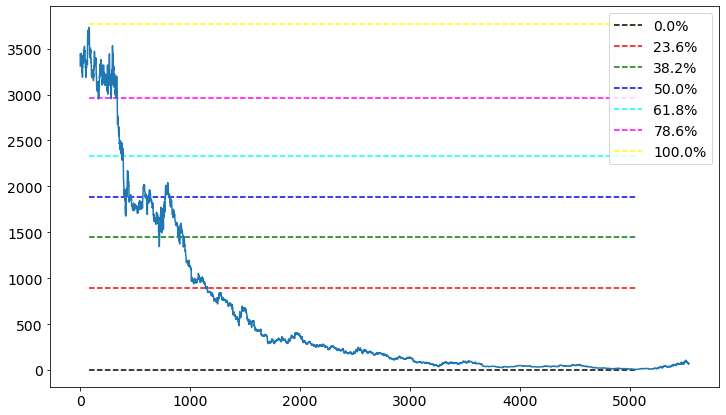

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plt.plot(df['close'])
start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]
for i in range(len(levels)):
    plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")
plt.legend()
plt.show()